In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
dataset_path = 'creditcard.csv'
data = pd.read_csv(dataset_path)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
data = data.to_numpy()
X, y  = data[:, :-1].astype(np.float64), data[:, -1].astype(np.uint8)

In [62]:
intercept = np.ones((X.shape[0], 1))

X = np.concatenate((intercept, X), axis=1)

In [64]:
X.shape

(284807, 31)

In [65]:
n_classes = np.unique(y, axis=0).shape[0]
n_samples = y.shape[0]

y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])

In [66]:
y_encoded[np.arange(n_samples), y] = 1

In [67]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

In [68]:
normalizer = StandardScaler()
X_train[:,1:] = normalizer.fit_transform(X_train[:, 1:])
X_test[:,1:] = normalizer.transform(X_test[:,1:])
X_val[:,1:] = normalizer.transform(X_val[:,1:])

In [69]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1)[:, None]

In [70]:
def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat

In [71]:
def compute_loss(y, y_hat):
    n = y.size
    return (-1/n)* np.sum(y * np.log(y_hat))

In [72]:
def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y))/n

In [73]:
def update_theta(theta, grad, lr):
    return theta-lr*grad

In [74]:
def accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc

In [75]:
lr = 0.01
epochs = 30
batch_size = 1024
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [76]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_i, y_hat)
        grad = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, grad, lr)
        train_batch_accs.append(accuracy(X_i, y_i, theta))
        train_batch_losses.append(train_loss)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val, y_val_hat)
        val_batch_accs.append(accuracy(X_val, y_val, theta))
        val_batch_losses.append(val_loss)
        
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)
    
    train_accs.append(train_batch_acc)
    train_losses.append(train_batch_loss)
    val_accs.append(val_batch_acc)
    val_losses.append(val_batch_loss) 
    print(f'epoch: {epoch+1} train loss: {train_batch_loss} train acc: {train_batch_acc} val loss: {val_batch_loss} val acc: {val_batch_acc}')

epoch: 1 train loss: 0.3004110867597534 train acc: 0.7411163794274228 val loss: 0.2972616537967952 val acc: 0.7425888964212759
epoch: 2 train loss: 0.1761789499952915 train acc: 0.9084999558615819 val loss: 0.17416263490027684 val acc: 0.9090511082962185
epoch: 3 train loss: 0.11455867238468175 train acc: 0.9710084440189048 val loss: 0.11319595013460838 val acc: 0.9715557560190823
epoch: 4 train loss: 0.0814646688370736 train acc: 0.9867787612722729 val loss: 0.080487841181966 val acc: 0.9871442860242414
epoch: 5 train loss: 0.06191304832413642 train acc: 0.9926826708043605 val loss: 0.061181920776501864 val acc: 0.9928769427031429
epoch: 6 train loss: 0.049484229839155236 train acc: 0.9957665315352021 val loss: 0.048919276340913864 val acc: 0.9960689942642825
epoch: 7 train loss: 0.04113107176601376 train acc: 0.9974486862595974 val loss: 0.040677852074249524 val acc: 0.997538529960145
epoch: 8 train loss: 0.03525153759071709 train acc: 0.9982722355769231 val loss: 0.03487046502052165

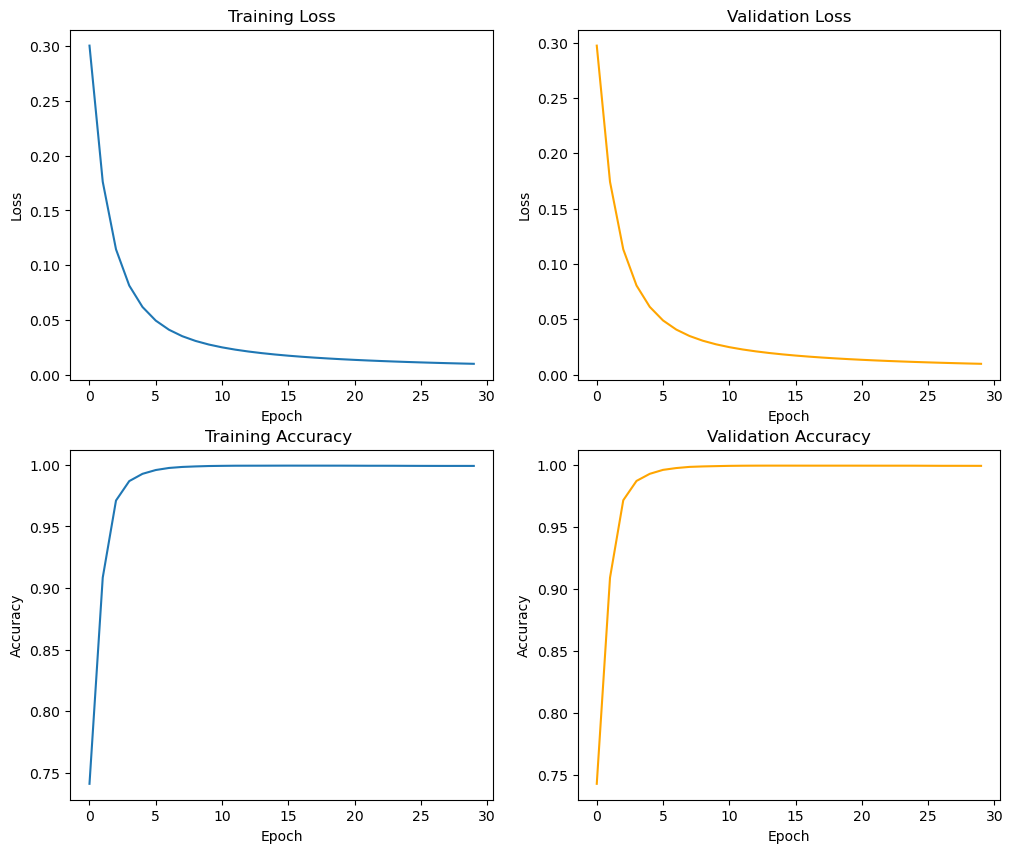

In [77]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax[0 , 0]. plot ( train_losses )
ax[0 , 0]. set ( xlabel ='Epoch', ylabel ='Loss')
ax[0 , 0]. set_title ('Training Loss')

ax[0 , 1]. plot ( val_losses , 'orange')
ax[0 , 1]. set ( xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1]. set_title ('Validation Loss')

ax[1 , 0]. plot ( train_accs )
ax[1 , 0]. set ( xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0]. set_title ('Training Accuracy ')

ax[1 , 1]. plot ( val_accs , 'orange')
ax[1 , 1]. set ( xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1]. set_title ('Validation Accuracy')

plt.show()

## Twitter Dataset

In [78]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tuann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [79]:
dataset_path = 'Twitter_Data.csv'
data = pd.read_csv(dataset_path)
data.head()

,clean_text,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples,-1.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars,1.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0


In [81]:
data = data.dropna()

In [82]:
def text_normalize(text):
    text = text.lower()
    text = re.sub(r'^rt[\s]+','', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    return text

In [83]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(data['clean_text']).toarray()

In [85]:
intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept, X), axis=1)

In [86]:
n_classes = data['category'].nunique()
n_samples = data.shape[0]

y = data['category'].to_numpy()+1
y = y.astype(np.uint8)
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [88]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=val_size, random_state=random_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state, shuffle=is_shuffle)

In [89]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

In [90]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_i, y_hat)
        grad = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, grad, lr)
        train_batch_accs.append(accuracy(X_i, y_i, theta))
        train_batch_losses.append(train_loss)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val, y_val_hat)
        val_batch_accs.append(accuracy(X_val, y_val, theta))
        val_batch_losses.append(val_loss)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_accs.append(train_batch_acc)
    train_losses.append(train_batch_loss)
    val_accs.append(val_batch_acc)
    val_losses.append(val_batch_loss)
    print(f'epoch: {epoch+1} train loss: {train_batch_loss} train acc: {train_batch_acc} val loss: {val_batch_loss} val acc: {val_batch_acc}')

epoch: 1 train loss: 0.3772173407220885 train acc: 0.3631813320710391 val loss: 0.37626101977839405 val acc: 0.367214824814383
epoch: 2 train loss: 0.376875662333945 train acc: 0.36451375374743594 val loss: 0.37592308191761353 val acc: 0.36822728109468
epoch: 3 train loss: 0.37654084208484356 train acc: 0.365644558985957 val loss: 0.37559190220723054 val acc: 0.3691783763882923
epoch: 4 train loss: 0.37621272986990756 train acc: 0.36682795981696736 val loss: 0.37526733319813105 val acc: 0.37031355464195864
epoch: 5 train loss: 0.3758911792196871 train acc: 0.36798506285173305 val loss: 0.37494923099796157 val acc: 0.37181689881573293
epoch: 6 train loss: 0.37557604720143334 train acc: 0.36898437910903065 val loss: 0.37463745517492814 val acc: 0.37313616002945327
epoch: 7 train loss: 0.37526719432327565 train acc: 0.37009765248338855 val loss: 0.3743318686644213 val acc: 0.3743940602564889
epoch: 8 train loss: 0.37496448444122077 train acc: 0.37135994670313294 val loss: 0.37403233767838

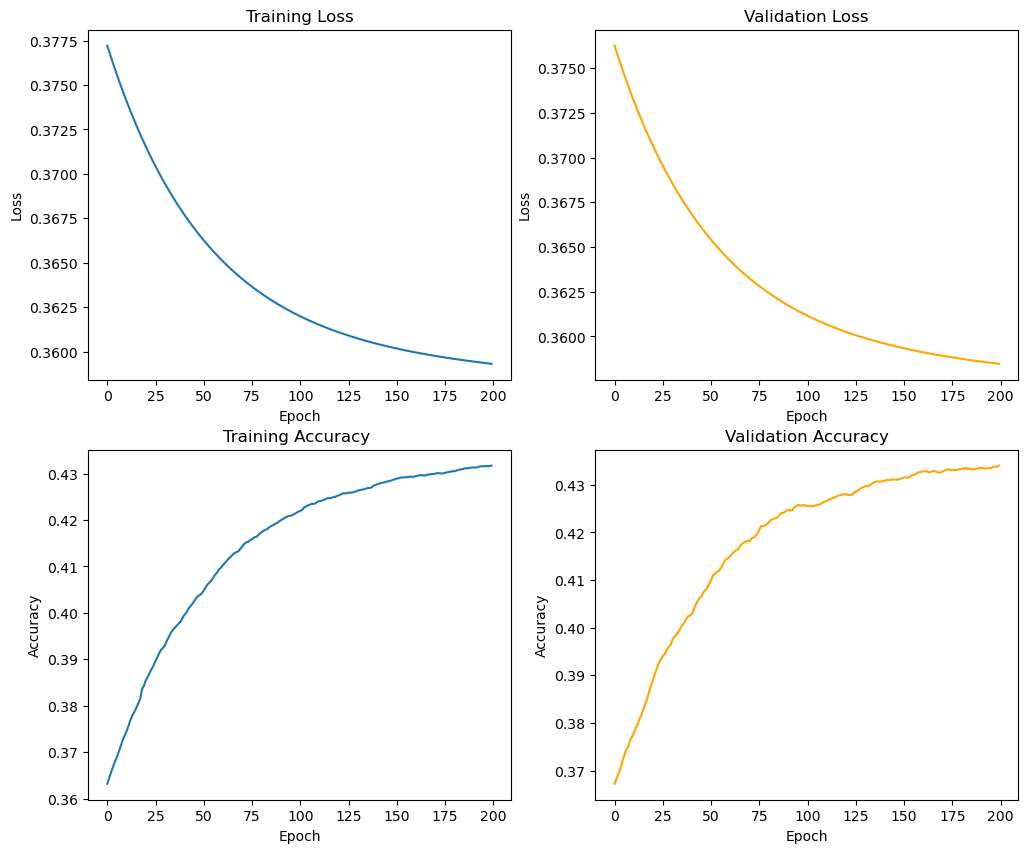

In [91]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax[0 , 0]. plot ( train_losses )
ax[0 , 0]. set ( xlabel ='Epoch', ylabel ='Loss')
ax[0 , 0]. set_title ('Training Loss')

ax[0 , 1]. plot ( val_losses , 'orange')
ax[0 , 1]. set ( xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1]. set_title ('Validation Loss')

ax[1 , 0]. plot ( train_accs )
ax[1 , 0]. set ( xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0]. set_title ('Training Accuracy ')

ax[1 , 1]. plot ( val_accs , 'orange')
ax[1 , 1]. set ( xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1]. set_title ('Validation Accuracy')

plt.show()

In [102]:
z = np.array([[-1., -2., 3.,2.]])
softmax(z)

array([[0.01314897, 0.00483724, 0.71790961, 0.26410418]])

In [105]:
y_hat = np.array([[0.,1.,3.,2.,0.,2.,1.,2.]])
y = np.array([[0.,0.,3.,2.,1.,2.,2.,1.]])
